In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
Train = pd.read_csv('SalaryData_Train(1).csv')
Train

age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58            Private      HS-grad            9              Widowed   
30159   22            Private      HS-grad            9        Never-married   
30160   52       Self-emp-inc      HS-grad            9   Married-civ-spouse   

               occupation    relationship    race      sex  capitalgain  \
0            Adm-clerical   Not-in-family   White     Male         2174   
1         Exec-managerial         Husband   White     Male            0   
2       Handlers-cleaners   Not-in-family   White     Male            0   
3       Handlers-cleaners         Husband   Black     Male            0   
4          Prof-specialty            Wife   Black   Female            0   
...                   ...             ...     ...      ...          ...   
30156        Tech-support            Wife   White   Female            0   
30157   Machine-op-inspct         Husband   White     Male            0   
30158        Adm-clerical       Unmarried   White   Female            0   
30159        Adm-clerical       Own-child   White     Male            0   
30160     Exec-managerial            Wife   White   Female        15024   

       capitalloss  hoursperweek          native  Salary  
0                0            40   United-States   <=50K  
1                0            13   United-States   <=50K  
2                0            40   United-States   <=50K  
3                0            40   United-States   <=50K  
4                0            40            Cuba   <=50K  
...            ...           ...             ...     ...  
30156            0            38   United-States   <=50K  
30157            0            40   United-States    >50K  
30158            0            40   United-States   <=50K  
30159            0            20   United-States   <=50K  
30160            0            40   United-States    >50K  

[30161 rows x 14 columns]

In [3]:
Test = pd.read_csv('SalaryData_Test(1).csv')
Test

age      workclass      education  educationno        maritalstatus  \
0       25        Private           11th            7        Never-married   
1       38        Private        HS-grad            9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm           12   Married-civ-spouse   
3       44        Private   Some-college           10   Married-civ-spouse   
4       34        Private           10th            6        Never-married   
...    ...            ...            ...          ...                  ...   
15055   33        Private      Bachelors           13        Never-married   
15056   39        Private      Bachelors           13             Divorced   
15057   38        Private      Bachelors           13   Married-civ-spouse   
15058   44        Private      Bachelors           13             Divorced   
15059   35   Self-emp-inc      Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0       Machine-op-inspct       Own-child                Black     Male   
1         Farming-fishing         Husband                White     Male   
2         Protective-serv         Husband                White     Male   
3       Machine-op-inspct         Husband                Black     Male   
4           Other-service   Not-in-family                White     Male   
...                   ...             ...                  ...      ...   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15057      Prof-specialty         Husband                White     Male   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0                0            0            40   United-States   <=50K  
1                0            0            50   United-States   <=50K  
2                0            0            40   United-States    >50K  
3             7688            0            40   United-States    >50K  
4                0            0            30   United-States   <=50K  
...            ...          ...           ...             ...     ...  
15055            0            0            40   United-States   <=50K  
15056            0            0            36   United-States   <=50K  
15057            0            0            50   United-States   <=50K  
15058         5455            0            40   United-States   <=50K  
15059            0            0            60   United-States    >50K  

[15060 rows x 14 columns]

In [4]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
Train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [6]:
Test[Test.isnull().any(axis=1)].shape

(0, 14)

In [7]:
Train['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [8]:
Test['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [9]:
pd.crosstab(Train['occupation'],Train['Salary'])

Salary               <=50K   >50K
occupation                       
 Adm-clerical         3223    498
 Armed-Forces            8      1
 Craft-repair         3122    908
 Exec-managerial      2055   1937
 Farming-fishing       874    115
 Handlers-cleaners    1267     83
 Machine-op-inspct    1720    245
 Other-service        3080    132
 Priv-house-serv       142      1
 Prof-specialty       2227   1811
 Protective-serv       434    210
 Sales                2614    970
 Tech-support          634    278
 Transport-moving     1253    319

In [10]:
pd.crosstab(Train['workclass'],Train['Salary'])

Salary              <=50K   >50K
workclass                       
 Federal-gov          578    365
 Local-gov           1458    609
 Private            17409   4876
 Self-emp-inc         474    600
 Self-emp-not-inc    1785    714
 State-gov            935    344
 Without-pay           14      0

In [11]:
pd.crosstab(Train['workclass'],Train['occupation'])

occupation          Adm-clerical   Armed-Forces   Craft-repair  \
workclass                                                        
 Federal-gov                 316              9             63   
 Local-gov                   281              0            143   
 Private                    2793              0           3146   
 Self-emp-inc                 28              0             99   
 Self-emp-not-inc             49              0            523   
 State-gov                   251              0             55   
 Without-pay                   3              0              1   

occupation          Exec-managerial   Farming-fishing   Handlers-cleaners  \
workclass                                                                   
 Federal-gov                    179                 8                  22   
 Local-gov                      212                29                  46   
 Private                       2647               450                1255   
 Self-emp-inc                   385                51                   2   
 Self-emp-not-inc               383               430                  15   
 State-gov                      186                15                   9   
 Without-pay                      0                 6                   1   

occupation          Machine-op-inspct   Other-service   Priv-house-serv  \
workclass                                                                 
 Federal-gov                       14              34                 0   
 Local-gov                         11             189                 0   
 Private                         1881            2665               143   
 Self-emp-inc                      10              27                 0   
 Self-emp-not-inc                  35             173                 0   
 State-gov                         13             123                 0   
 Without-pay                        1               1                 0   

occupation          Prof-specialty   Protective-serv   Sales   Tech-support  \
workclass                                                                     
 Federal-gov                   167                27      14             66   
 Local-gov                     692               304       7             38   
 Private                      2254               186    2895            723   
 Self-emp-inc                  157                 5     281              3   
 Self-emp-not-inc              365                 6     376             26   
 State-gov                     403               116      11             56   
 Without-pay                     0                 0       0              0   

occupation          Transport-moving  
workclass                             
 Federal-gov                      24  
 Local-gov                       115  
 Private                        1247  
 Self-emp-inc                     26  
 Self-emp-not-inc                118  
 State-gov                        41  
 Without-pay                       1

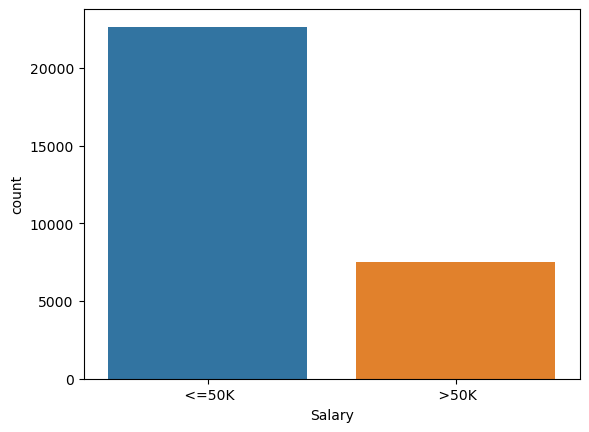

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [12]:
sns.countplot(x='Salary',data= Train)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
Train['Salary'].value_counts()

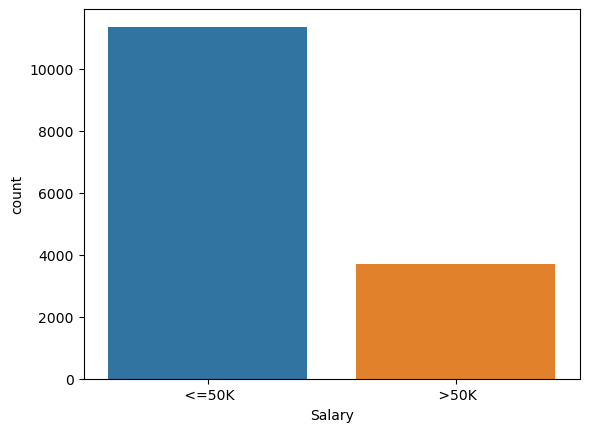

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [13]:
sns.countplot(x='Salary',data= Test)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
Test['Salary'].value_counts()

<Axes: xlabel='occupation', ylabel='age'>

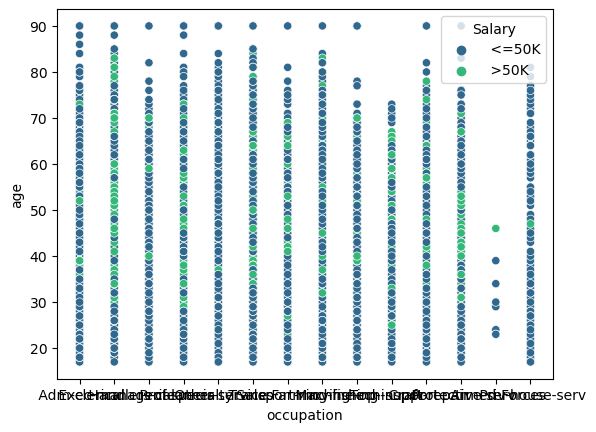

In [14]:
sns.scatterplot(x= Train['occupation'], y = Train['age'], hue=Train['Salary'], palette='viridis')

In [15]:
import plotly.express as pe

In [16]:
pe.scatter_3d(data_frame=Train,x = 'age',y = 'occupation',z = 'sex', color = 'Salary')

<Axes: xlabel='education'>

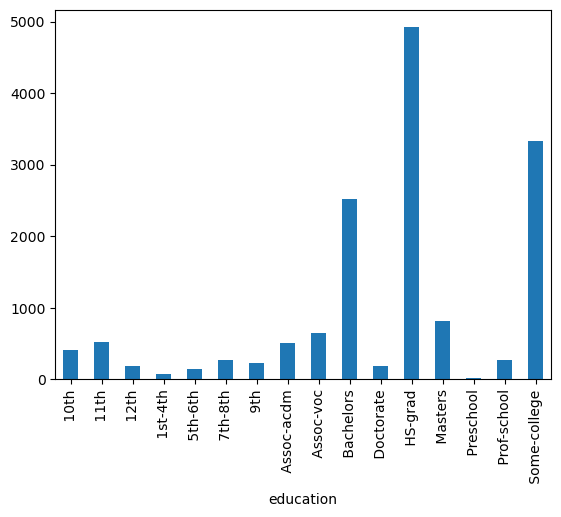

In [17]:
pd.crosstab(Train['Salary'],Train['education']).mean().plot(kind='bar')

<Axes: xlabel='occupation'>

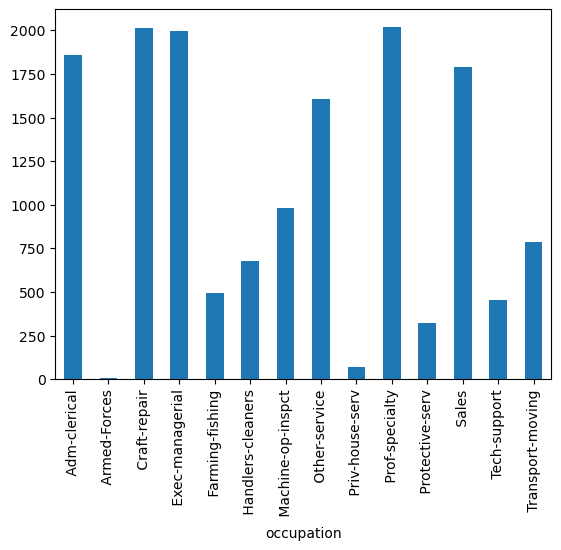

In [18]:
pd.crosstab(Train['Salary'],Train['occupation']).mean().plot(kind='bar')

<Axes: xlabel='workclass'>

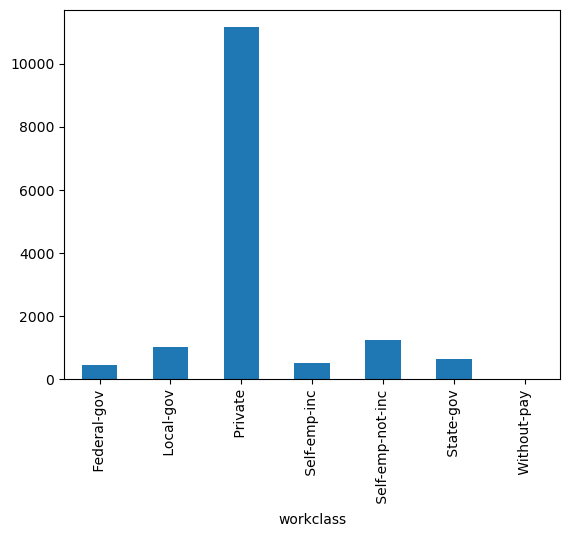

In [19]:
pd.crosstab(Train['Salary'],Train['workclass']).mean().plot(kind='bar')

<Axes: xlabel='sex'>

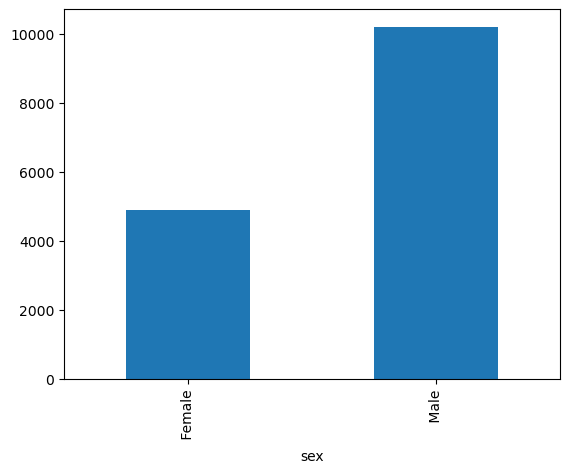

In [20]:
pd.crosstab(Train['Salary'],Train['sex']).mean().plot(kind='bar')

<Axes: xlabel='relationship'>

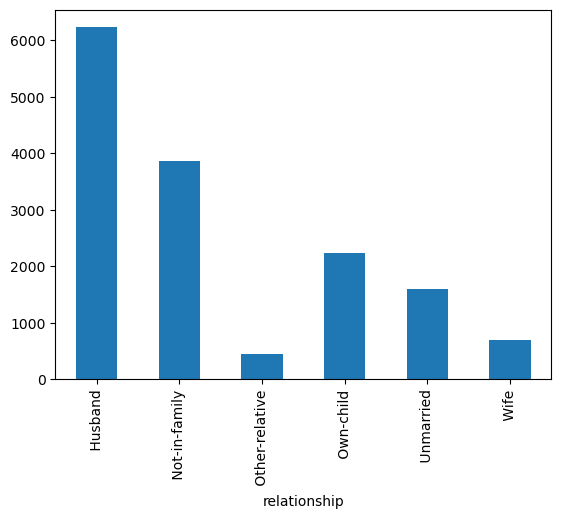

In [21]:
pd.crosstab(Train['Salary'],Train['relationship']).mean().plot(kind='bar')

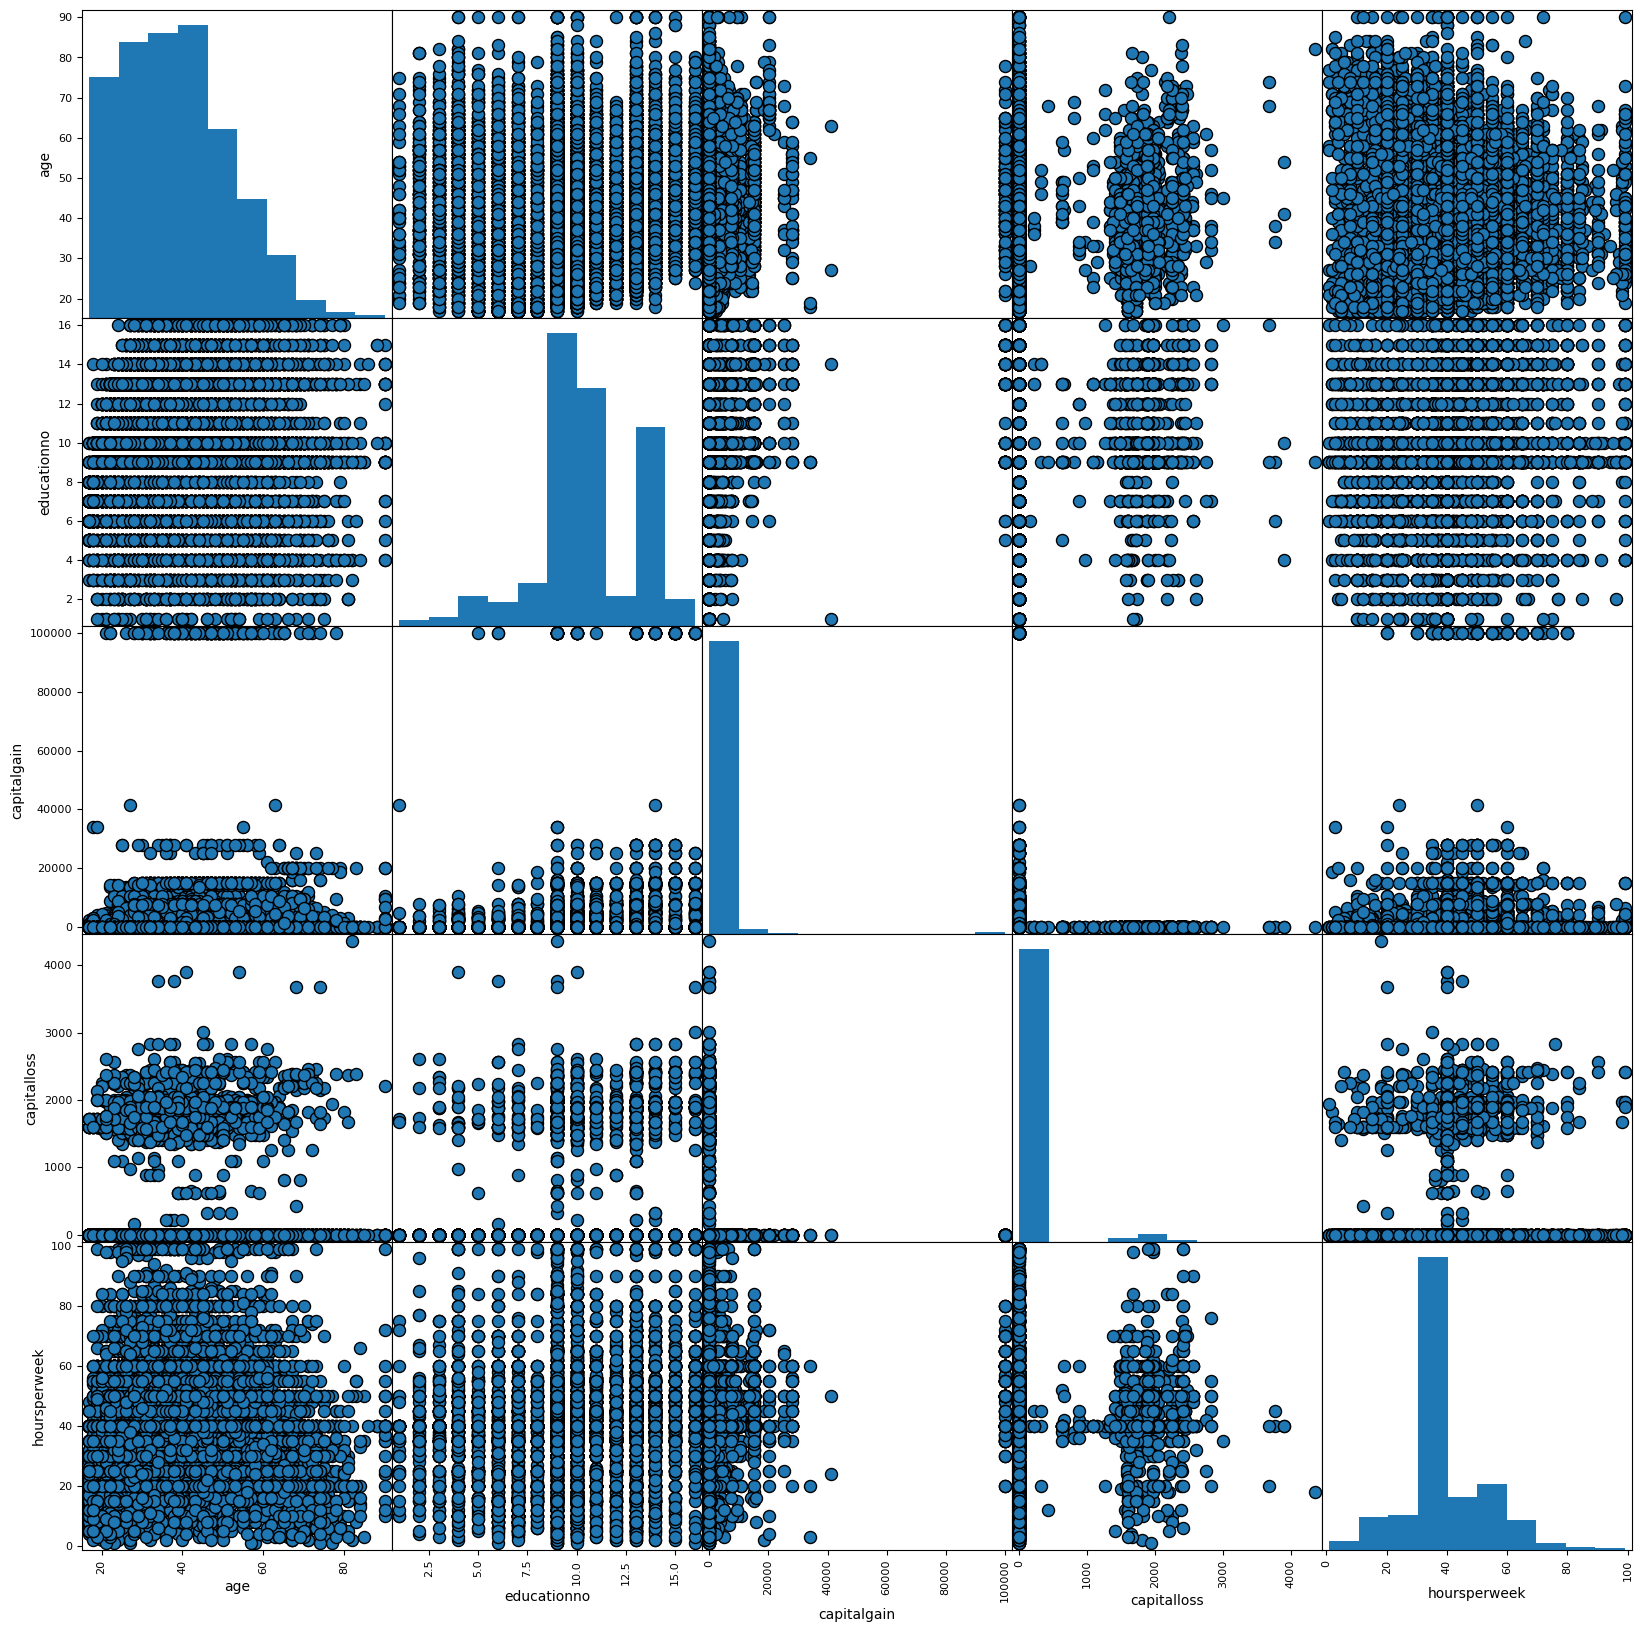

In [22]:
# scatter matrix to observe relationship between every colomn attribute. 
pd.plotting.scatter_matrix(Train,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 300,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()

In [23]:
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [24]:
##Preprocessing the data. As, there are categorical variables
number = LabelEncoder()
for i in string_columns:
        Train[i]= number.fit_transform(Train[i])
        Test[i]=number.fit_transform(Test[i])

In [25]:
Train

age  workclass  education  educationno  maritalstatus  occupation  \
0       39          5          9           13              4           0   
1       50          4          9           13              2           3   
2       38          2         11            9              0           5   
3       53          2          1            7              2           5   
4       28          2          9           13              2           9   
...    ...        ...        ...          ...            ...         ...   
30156   27          2          7           12              2          12   
30157   40          2         11            9              2           6   
30158   58          2         11            9              6           0   
30159   22          2         11            9              4           0   
30160   52          3         11            9              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0                 1     4    1         2174            0            40   
1                 0     4    1            0            0            13   
2                 1     4    1            0            0            40   
3                 0     2    1            0            0            40   
4                 5     2    0            0            0            40   
...             ...   ...  ...          ...          ...           ...   
30156             5     4    0            0            0            38   
30157             0     4    1            0            0            40   
30158             4     4    0            0            0            40   
30159             3     4    1            0            0            20   
30160             5     4    0        15024            0            40   

       native  Salary  
0          37   <=50K  
1          37   <=50K  
2          37   <=50K  
3          37   <=50K  
4           4   <=50K  
...       ...     ...  
30156      37   <=50K  
30157      37    >50K  
30158      37   <=50K  
30159      37   <=50K  
30160      37    >50K  

[30161 rows x 14 columns]

In [26]:
Test

age  workclass  education  educationno  maritalstatus  occupation  \
0       25          2          1            7              4           6   
1       38          2         11            9              2           4   
2       28          1          7           12              2          10   
3       44          2         15           10              2           6   
4       34          2          0            6              4           7   
...    ...        ...        ...          ...            ...         ...   
15055   33          2          9           13              4           9   
15056   39          2          9           13              0           9   
15057   38          2          9           13              2           9   
15058   44          2          9           13              0           0   
15059   35          3          9           13              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0                 3     2    1            0            0            40   
1                 0     4    1            0            0            50   
2                 0     4    1            0            0            40   
3                 0     2    1         7688            0            40   
4                 1     4    1            0            0            30   
...             ...   ...  ...          ...          ...           ...   
15055             3     4    1            0            0            40   
15056             1     4    0            0            0            36   
15057             0     4    1            0            0            50   
15058             3     1    1         5455            0            40   
15059             0     4    1            0            0            60   

       native  Salary  
0          37   <=50K  
1          37   <=50K  
2          37    >50K  
3          37    >50K  
4          37   <=50K  
...       ...     ...  
15055      37   <=50K  
15056      37   <=50K  
15057      37   <=50K  
15058      37   <=50K  
15059      37    >50K  

[15060 rows x 14 columns]

In [27]:
##Capturing the column names which can help in futher process
colnames = Train.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [28]:
# Preprocess data
X_train = Train.drop(columns=['Salary'])
y_train = Train['Salary']
X_test = Test.drop(columns=['Salary'])
y_test = Test['Salary']

In [29]:
X_train

age  workclass  education  educationno  maritalstatus  occupation  \
0       39          5          9           13              4           0   
1       50          4          9           13              2           3   
2       38          2         11            9              0           5   
3       53          2          1            7              2           5   
4       28          2          9           13              2           9   
...    ...        ...        ...          ...            ...         ...   
30156   27          2          7           12              2          12   
30157   40          2         11            9              2           6   
30158   58          2         11            9              6           0   
30159   22          2         11            9              4           0   
30160   52          3         11            9              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  
0                 1     4    1         2174            0            40      37  
1                 0     4    1            0            0            13      37  
2                 1     4    1            0            0            40      37  
3                 0     2    1            0            0            40      37  
4                 5     2    0            0            0            40       4  
...             ...   ...  ...          ...          ...           ...     ...  
30156             5     4    0            0            0            38      37  
30157             0     4    1            0            0            40      37  
30158             4     4    0            0            0            40      37  
30159             3     4    1            0            0            20      37  
30160             5     4    0        15024            0            40      37  

[30161 rows x 13 columns]

In [30]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
X_train_scaled

array([[ 0.04277892,  2.93594688, -0.34982703, ..., -0.21850808,
        -0.07773541,  0.26635842],
       [ 0.88026081,  1.88764517, -0.34982703, ..., -0.21850808,
        -2.33149486,  0.26635842],
       [-0.0333558 , -0.20895825,  0.1748048 , ..., -0.21850808,
        -0.07773541,  0.26635842],
       ...,
       [ 1.48933854, -0.20895825,  0.1748048 , ..., -0.21850808,
        -0.07773541,  0.26635842],
       [-1.25151126, -0.20895825,  0.1748048 , ..., -0.21850808,
        -1.74718685,  0.26635842],
       [ 1.03253024,  0.83934346,  0.1748048 , ..., -0.21850808,
        -0.07773541,  0.26635842]])

In [ ]:
# Model training and evaluation
parameters = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svm_classifier = GridSearchCV(SVC(), parameters, cv=5)
svm_classifier.fit(X_train_scaled, y_train)

In [ ]:
# Best parameters and score
print("Best Parameters:", svm_classifier.best_params_)
print("Best Score:", svm_classifier.best_score_)